In [1]:
from ArNet import *
from utils import *
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
import IPython
%matplotlib inline
%run ./ArNet.py

Using TensorFlow backend.


In [2]:
img_size = (360,480)

img_path = './CamVid/train'
mask_path = './CamVid/trainannot'
val_path = './CamVid/val'
val_masks = './CamVid/valannot'

X_train = load_images(img_size[0],img_size[1],img_path= img_path)
X_train_masks = load_images(img_size[0],img_size[1],img_path=mask_path)
X_val = load_images(img_size[0],img_size[1],val_path)
X_val_masks = load_images(img_size[0],img_size[1],val_masks)

100%|███████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 654.59it/s]


In [3]:
Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road_marking = [255,69,0]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

# We dont want to classify unlabelled.it will only make our dataset more unbalanced than it already is
label_values = [Sky,Building,Pole,Road,Pavement,Tree,
                SignSymbol,Fence,Car,Pedestrian,Bicyclist,Unlabelled]

In [4]:
X_train_norm = [equalize_hist(X_train[i]) for i in range(len(X_train))]
X_val_norm = [equalize_hist(X_val[i]) for i in range(len(X_val))]
X_train_norm = np.array(X_train_norm)
X_val_norm = np.array(X_val_norm)
np.save("C:/Users/arik0/ArNet/Training/X_train.npy",X_train_norm)
np.save("C:/Users/arik0/ArNet/Training/X_val_norm.npy",X_val_norm)

In [5]:
y_train_norm = [one_hot_it(X_train_masks[i],label_values) for i in range(len(X_train_masks))]
y_train_val = [one_hot_it(X_val_masks[i],label_values) for i in range(len(X_val_masks))]
y_train_norm = np.array(y_train_norm)
y_train_val = np.array(y_train_val)
np.save("C:/Users/arik0/ArNet/Training/y_train.npy",y_train_norm)
np.save("C:/Users/arik0/ArNet/Training/y_val.npy",y_train_val)

In [6]:
X_train = np.load("C:/Users/arik0/ArNet/Training/X_train.npy")
y_train_norm = np.load("C:/Users/arik0/ArNet/Training/y_train.npy")
X_val = np.load("C:/Users/arik0/ArNet/Training/X_val_norm.npy")
y_val = np.load("C:/Users/arik0/ArNet/Training/y_val.npy")

In [7]:
X_oh = reverse_one_hot(y_train_norm)
weights = median_frequency_balancing(X_oh)

C:\Users\arik0\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\arik0\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
from keras.callbacks import ModelCheckpoint
from livelossplot.keras import PlotLossesCallback
fpathmodel="C:/Users/arik0/ArNet/logseg/seg1.hdf5"
cp = ModelCheckpoint(fpathmodel, monitor='acc', verbose=2, save_best_only=True, mode='min') 
callbacks_list = [cp,PlotLossesCallback()]

In [9]:
network = arnet(img_size=(360,480,3),classes=12,optimizer='adam',loss_function='categorical_crossentropy',metric=['acc'])

In [10]:
y_train_norm = y_train_norm.reshape((y_train_norm.shape[0],y_train_norm.shape[1]*y_train_norm.shape[2],
                                    y_train_norm.shape[3]))

y_val = y_val.reshape((y_val.shape[0],y_val.shape[1]*y_val.shape[2],
                                    y_val.shape[3]))

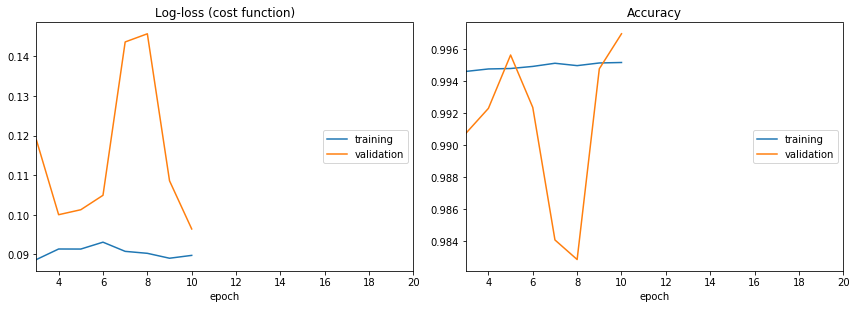

Log-loss (cost function):
training   (min:    0.089, max:    0.158, cur:    0.090)
validation (min:    0.096, max:    0.159, cur:    0.096)

Accuracy:
training   (min:    0.994, max:    0.995, cur:    0.995)
validation (min:    0.982, max:    0.997, cur:    0.997)
Epoch 11/20
 29/367 [=>............................] - ETA: 20:52 - loss: 0.0921 - acc: 0.9947

In [ ]:
network.fit(X_train,y_train_norm, 
                  validation_data=(X_val,y_val),batch_size=1,shuffle=True,
                  epochs=20, verbose=1, callbacks=callbacks_list,class_weight=weights)